# Problemas de clasificación con TenforFlow

En muchas ocaciones es interesante estudiar las caracteristicas de permiten identificar un objeto. El objetivo de esta sección es mostrar como por medio de TensorFlow y metodos de clasificación se pueden crear algortimos que permitan clasificar elemento en algunas de de las caregorias predefinidas.

* Si recibo una foto de un plato de comida el algoritmo es capaz de etiquetarme a que clase de comida de refiere la foto.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles


# Definir el número de muestras a trabajar
n_muestras = 1000

# Crear una base de datos de criculos
X, y = make_circles(n_muestras,
                    noise=0.03,
                    random_state=123)

In [ ]:
import pandas as pd
circulos = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'etiqueta':y})
circulos.head()

,X0,X1,etiqueta
0,-0.079037,1.023805,0
1,-0.832685,0.554006,0
2,0.805365,0.534898,0
3,0.420145,0.680562,1
4,-0.129951,0.984570,0


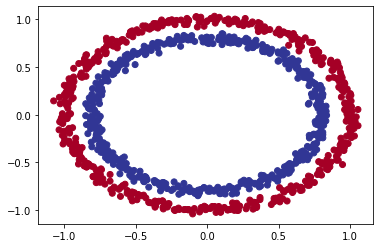

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(circulos.X0, circulos.X1, c=y, cmap=plt.cm.RdYlBu)

# Dimensiones de la entrada y la salida

In [ ]:
X[0], y[0]

(array([-0.07903747,  1.02380474]), 0)

## Pasos en modelamiento

Pasos tipicos en el modelamiento con TensorFlow:

1. Instanciar el modelo.
2. Compilar el modelo.
3. Ajustar el modelo.
4. Evaluar el modelo.
5. Mejorar.
6. Evaluar.


In [ ]:
# Definir la semilla aleatoria
tf.random.set_seed(123)

# 1. Crear el modelo
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compilar el modelo
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
# 3. Ajustar el modelo
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 4.8890 - accuracy: 0.4760
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 3.0771 - accuracy: 0.4730
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7125 - accuracy: 0.5020
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4980
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4900
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4940
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4900
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4640


In [ ]:
# 4. Evaluación del modelo 
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4710


[0.6933242082595825, 0.47099998593330383]

En este caso el modelo un valor para la exactitud menor al 50%. Por lo que intentaremos incrementando el número de iteraciones.

In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5040


[0.6932167410850525, 0.5040000081062317]

Al evaluar nuevamente el modelo, despues de incrementar el número de corridas notamos que no existen un incremento significativo en la exactitud por lo que intentamos ajustar una red neural un poco mas compleja

In [ ]:
# Se define la semilla aleatoria
tf.random.set_seed(123)

# 1. Se crea el modelo
modelo_2 = tf.keras.Sequential()
modelo_2.add(tf.keras.layers.Dense(1))
modelo_2.add(tf.keras.layers.Dense(1))

# 2. Se compila el modelo
modelo_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

# 3. Se ajusta el modelo
modelo_2.fit(X, y, epochs=200, verbose=0)

In [ ]:
modelo_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.2995 - accuracy: 0.5190


[7.299530506134033, 0.5189999938011169]

Incluso con un modelo con un nivel de complejidad mayor no es suficiente para que el mejor tenga un mejor comportamiento en el conjunto de datos por lo que buscaremos nuevas estrategias para mejorar su desempeño.

# Usamos nuevas estrategias para mejorar nuestro modelo

In [ ]:
# Definir la semilla aleatoria
tf.random.set_seed(123)

# 1. Crear el modelo (Esta vez 3 capaz)
modelo_3 = tf.keras.Sequential()
modelo_3.add(tf.keras.layers.Dense(100))
modelo_3.add(tf.keras.layers.Dense(10))
modelo_3.add(tf.keras.layers.Dense(1))

# 2. Compilar el modelo (Se cambia el optimizador por adam)
modelo_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Ajutar el modelo
modelo_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluar el modelo
modelo_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5010


[0.693300724029541, 0.5009999871253967]

Vamos a visualizar nuestras predicciones 

In [ ]:
import numpy as np

In [ ]:
def grafico_limites_decision(modelo, X, y):
  # Definir los limites  del grafico
  x_minimo, x_maximo = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
  y_minimo, y_maximo = X[:, 1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_minimo, x_maximo, 100),
                      np.linspace(y_minimo, y_maximo, 100))

  # Crear valores X para realizar predicciones con estos
  x_entrada = np.c_[xx.ravel(), yy.ravel()] # Pila "D en un mismo array" similar a la funcion zip pero en vez de agrupar en tuplas lo hace en listas

  # Hacer predicciones
  y_predicciones = modelo.predict(x_entrada)

  # Chequiar si las predicciones son multiclase
  if len(y_predicciones[0]) > 1:
    print('Se esta realizando clasificiación multi clase')
    y_predicciones = np.argmax(y_predicciones, axis=1).reshape(xx.shape)
  else:
    print('Se esta realizando clasificiación binaria')
    y_predicciones = np.round(y_predicciones).reshape(xx.shape)

  # Graficar el limite de decision
  plt.contourf(xx, yy, y_predicciones, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
# Evaluar las predicciones de nuestro modelo 
grafico_limites_decision(X=X, modelo=modelo_3, y=y)

NameError: ignored

El problema se debe a que estamos tratando de solucionar un problema de clasificación haciendo uso de un enfoque de regresión. Como podemos ver en la figura enterior, aunque el modelo fue con plejizado con el proposito de que aprnda a clasificar los datos este no tiene esa habilidad y por consiguiente trata de crear un modelo linela perfecto el cual no soluciona este problema. A continuación  vamos a solucionar este problema.

In [ ]:
# Definir la semilla aleatoria
tf.random.set_seed(123)

# 1. Crear el modelo
modelo_4 = tf.keras.Sequential()
modelo_4.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_4.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 2. Commpilar el modelo
modelo_4.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['accuracy'])

# 3.  Ajustar el modelo
historia = modelo_4.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
modelo_4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.9990


[0.13310305774211884, 0.9990000128746033]

Se esta realizando clasificiación binaria


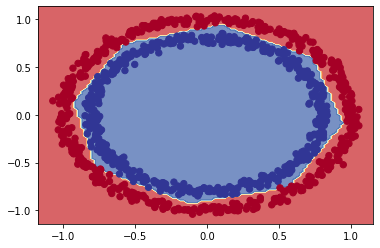

In [ ]:
grafico_limites_decision(modelo_4, X, y)

En este caso el modelo fue entrenado con el 100% de los datos, lo cual es valido si el proposito es ejemplificar y inducir el concepto de **no linearidad** pero en situaciones normales, con el proposito de envitar el sobre ajuste, los conjuntos de datos deben ser particionados en conjunto de entrenamiento(el estudio para al examen), el conjunto de testeo(Los ejercicios) y el conjunto de test(El examen de la materia).

Text(0.5, 1.0, 'Curvas de aprendizaje')

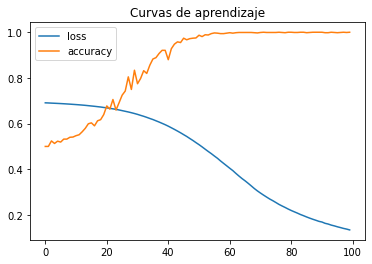

In [ ]:
pd.DataFrame(historia.history).plot()
plt.title('Curvas de aprendizaje')

## Buscar la mejor tasa de aprendizaje para el optimizador

El objetivo de la tasa de aprendizaje es ajustar un parametros que le permita al enfoque de optimización con Adam encontrar de manera oportuna la mejor valor para la funcion de perdida.

* Llamar el *callback* de la tasa de aprendizaje.

In [ ]:
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set


In [ ]:
# Definir la semilla aleatoria
tf.random.set_seed(123)

# 1. Crear el modelo
modelo_5 = tf.keras.Sequential()
modelo_5.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_5.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 2. Compilar el modelo
modelo_5.compile(loss='binary_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

# 3. Crear un callback para la tasa de aprendizaje
programador_ta = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 ** (epochs / 20))

# 4. Ajustar el modelo a los datos (Pasando el callback de la tasa de aprendizaje)
historia = modelo_5.fit(X_train, y_train, epochs=100, callbacks=[programador_ta])


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.4837 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4837 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.4837 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.4837 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.4837 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

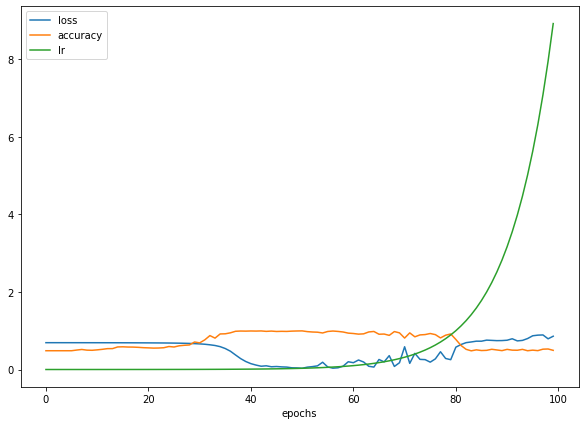

In [ ]:
pd.DataFrame(historia.history).plot(figsize=(10, 7), xlabel='epochs')

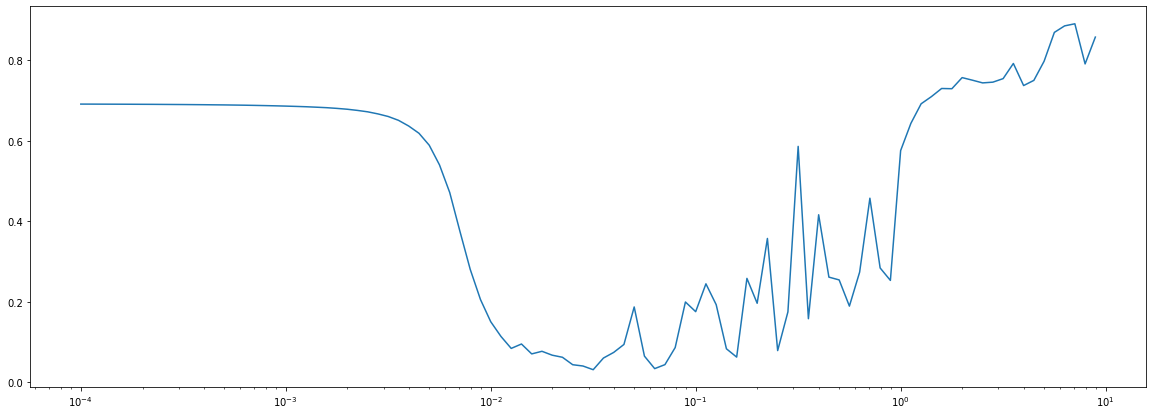

In [ ]:
tasas = 1e-4 * 10 ** (tf.range(100) / 20)
plt.figure(figsize=(20, 7))
plt.semilogx(tasas, historia.history['loss'])

El gráfico anterior presenta el valor de la tasa de aprendizaje vs el valor de la función de perdido. En este caso se puede apreciar que un buen valor para la tasa de aprendizaje podria ser 0.02

In [ ]:
# Definir la semilla aleatoria
tf.random.set_seed(123)

# 1. Crear el modelo
modelo_6 = tf.keras.Sequential()
modelo_6.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_6.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 2. Compilar el modelo
modelo_6.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# 4. Ajustar el modelo a los datos (Con la mejor tasa de aprendizaje)
historia = modelo_6.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5263
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.6662
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.6938
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.8213
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.9513
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.9663
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9812
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1512 - accuracy: 0.9812
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9950
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9962
Epoch 11/20
25/25 [

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_predicho = modelo_6.predict(X_test)


En este caso tenemos un error debido a que nuestros valores reales no se encuentran expresados de manera binario y la función de la maestriz de confunción no puede comprar. PAra solucionar esto realizamos una aproximación por medio de la función round que toma como punto de corte 0.5

In [ ]:
confusion_matrix(y_test, tf.round(y_predicho))

array([[113,   0],
       [  0,  87]])

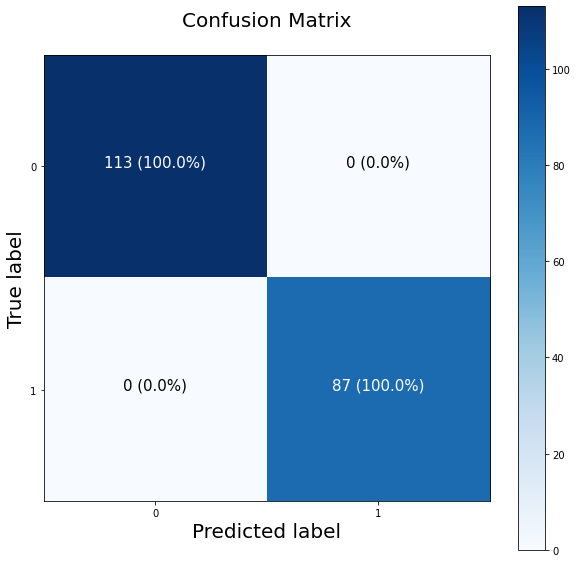

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
import numpy as np

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_predicho))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Clasificador multiclase

En este caso el problema es el mismo que cuando trabajamos con un clasificador binaario. Sin embargo tenemos mas de 2 categorias. Para la clasificación multiclase usamos una arquitectura similar a la de la clasificación binaria a diferencia que la función de activación de la capa de salida es una sofmax.


In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# Se define la semilla aleatoria
tf.random.set_seed(123)

# Se crea el modelo
modelo_7 = tf.keras.Sequential()
modelo_7.add(tf.keras.layers.Flatten(input_shape=(28,28))) # Se ponene todos las columnas como una ilera  uan debajo de la otra
modelo_7.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_7.add(tf.keras.layers.Dense(4, activation='relu'))
modelo_7.add(tf.keras.layers.Dense(10, tf.keras.activations.softmax)) # igual al numero de clases en el conjunto de datos

# Se compila el modelo
modelo_7.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Ajustar el modelo
historia = modelo_7.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2584 - accuracy: 0.1394 - val_loss: 1.8621 - val_accuracy: 0.2035
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7970 - accuracy: 0.2034 - val_loss: 1.7169 - val_accuracy: 0.2361
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6824 - accuracy: 0.2691 - val_loss: 1.6642 - val_accuracy: 0.2712
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6402 - accuracy: 0.2761 - val_loss: 1.6261 - val_accuracy: 0.2823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6175 - accuracy: 0.2787 - val_loss: 1.6252 - val_accuracy: 0.2719
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6069 - accuracy: 0.2804 - val_loss: 1.6079 - val_accuracy: 0.2831
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6004 - accuracy: 0.2795 - val_loss: 1.6184 - val_accuracy:

In [ ]:
modelo_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
